# Siniestros Viales

Este notebook tiene el analisis de la letalidad de siniestros viales en CABA (Ciudad Autonoma de Buenos Aires), del 2016 al 2021, con datos proporcionados por el gobierno.

En este trabajo se abordan los accidentes letales, en donde se llevaron a cabo y con que tipo de victimas, además indicar los vehiculos invulucrados. Para ello se cuentan con datasets con datos de los siniestros (tabla de hechos) y de las victimas (tabla de victimas) la cual contiene datos importantes sin llegar a invadir la privacidad de las personas involucradas.

Con los datasets se busca conocer el donde se llevan a cabo más accidentes, quienes son los que más sufren los accidentes entre otros datos que nos puedan ayudar a entender sobre este tema y sus posibles causas.

In [2]:
# Se importan las librerias para el proyecto
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point
from herramientas import *
import matplotlib.pyplot as plt
import seaborn as sns

## ETL

### Tabla de Hechos

Se procede a hacer un proceso de ETL (Extracción, Transformación y Carga) de los datos del dataset homicidios en la tabla de hechos

In [3]:
df = pd.read_excel('homicidios.xlsx')
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
# Una vez cargado el dataframe continuamos verificando el tipo de datos que contiene
verificar_tipo_datos(df)

ID  (nulos) =  0
N_VICTIMAS  (nulos) =  0
FECHA  (nulos) =  0
AAAA  (nulos) =  0
MM  (nulos) =  0
DD  (nulos) =  0
HORA  (nulos) =  0
HH  (nulos) =  0
LUGAR_DEL_HECHO  (nulos) =  0
TIPO_DE_CALLE  (nulos) =  0
Calle  (nulos) =  1
Altura  (nulos) =  567
Cruce  (nulos) =  171
Dirección Normalizada  (nulos) =  8
COMUNA  (nulos) =  0
XY (CABA)  (nulos) =  0
pos x  (nulos) =  0
pos y  (nulos) =  0
PARTICIPANTES  (nulos) =  0
VICTIMA  (nulos) =  0
ACUSADO  (nulos) =  0

filas completamente nulas:  0


,nombre_campo,tipo_datos,no_nulos_%,nulos_%
0,ID,[<class 'str'>],100.00,0.00
1,N_VICTIMAS,[<class 'int'>],100.00,0.00
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00
3,AAAA,[<class 'int'>],100.00,0.00
4,MM,[<class 'int'>],100.00,0.00
5,DD,[<class 'int'>],100.00,0.00
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00
7,HH,"[<class 'int'>, <class 'str'>]",100.00,0.00
8,LUGAR_DEL_HECHO,[<class 'str'>],100.00,0.00
9,TIPO_DE_CALLE,[<class 'str'>],100.00,0.00


#### Transformaciónes de tipo de datos

Se aplican las transformaciones necesarias al tipo de datos ya que con ellas haremos los analisis.
Viendo el tipo de dato se tienen que cambiar, los tipos de dato de "HORA" , "pos x", "pos y".
Para esto se requiere aplicar a Hora, pasarlo a formato datetime y a las posiciones pasarlas "pos x" y "pos y" a tipo float.

In [5]:
# Se cambia el tipo de dato de "HORA" a formato datetime timestamp
df['HORA'] = pd.to_datetime(df["HORA"], format='%H:%M:%S', errors="coerce")
df 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,1900-01-01 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1900-01-01 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,1900-01-01 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,1900-01-01 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [6]:
# Dado que los datos de posicion no estan en forma numerica se cambian a float que es un mejor formato para las posiciones.
df['pos x'] = pd.to_numeric(df['pos x'], errors='coerce')
df['pos y'] = pd.to_numeric(df['pos y'], errors='coerce')

In [7]:
# Se comprueba que se cambiaran los tipos de datos 
df.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                     datetime64[ns]
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                           float64
pos y                           float64
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

#### Eliminación de columnas innecesarias

Se elimina la columna "Altura" ya que cuenta con 81.47% de valores nulos, lo que nos indica que hay muy pocos valores con los cuales podemos trabajar.

In [8]:
df = df.drop('Altura', axis=1)

In [9]:
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS


#### Transformaciónes de columnas

La columna cruce no trae tanta informacion ya que hay mucho nulos por lo que se aplicara un filtro que nos indique si hay un cruce


In [10]:
#  Se genera una columna que nos da si la calle fue un cruce o no 

def transformar_cruce(valor):
    if pd.isna(valor):
        return False 
    else:
        return True


df["Hay Cruce"] = df["Cruce"].apply(transformar_cruce)

In [11]:
# Se comprueba que se agregara la columna
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True


#### Se buscan valores nulos

Los valores nulos no necesariamente son errores por lo que se buscan los valores y dependiendo de la columna se escojen cuales valores nulos pueden eliminarse.

In [12]:
df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                     12
pos y                     12
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
Hay Cruce                  0
dtype: int64

Podemos ver que hay mayor cantidad de nulos en las columnas de posición y son en ambas "pos x" y "pos y" por lo que se plantea que psoiblemente sean en las mismas posiciónes.
Hay una que no tiene hora la cual se va a buscar si es un error ya que el no tenerla puede indicar un error.

In [13]:
df[df['HORA'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
518,2019-0103,1,2019-12-18,2019,12,18,NaT,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,True


Se comprueba que el valor nulo no es un error.

In [14]:
df[df['pos x'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
38,2016-0052,1,2016-04-20,2016,4,20,1900-01-01 20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD,False
106,2016-0136,1,2016-10-25,2016,10,25,1900-01-01 00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,...,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD,False
139,2016-0174,1,2016-12-27,2016,12,27,1900-01-01 00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD,False
176,2017-0042,1,2017-04-10,2017,4,10,1900-01-01 09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False
180,2017-0050,2,2017-04-28,2017,4,28,1900-01-01 11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,False
181,2017-0051,1,2017-05-01,2017,5,1,1900-01-01 03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO,False
256,2017-0140,1,2017-11-19,2017,11,19,1900-01-01 23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS,False
313,2018-0039,1,2018-04-21,2018,4,21,1900-01-01 22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO,False
546,2020-0026,1,2020-05-17,2020,5,17,1900-01-01 06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,False


In [15]:
df[df['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,...,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD,False


No se encontraron datos nulos que eliminar, se encontro que todos los renglones son utiles

#### Se buscan valores duplicados

Se comprueba que no existan valores duplicados que nos lleven a un error.

In [16]:
df[df.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce


#### SE EXPORTA A CSV

Una vez limpio el dataset este se exporta a csv para que se pueda acceder a el con facilidad

In [17]:
df.to_csv('homicidios.csv', index = False)

In [3]:
# Se comprueba que el CSV funcione
df = pd.read_csv('homicidios.csv')
df.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Hay Cruce
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True


### Tabla de Victimas 

Una vez terminado el ETL de la tabla "HECHOS" se continua con el ETL de la tabla "VICTIMAS"

In [40]:
df2 = pd.read_excel("homicidios.xlsx", "VICTIMAS")
df2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [41]:
# Una vez cargado el dataframe continuamos verificando el tipo de datos que contiene
verificar_tipo_datos(df2)

ID_hecho  (nulos) =  0
FECHA  (nulos) =  0
AAAA  (nulos) =  0
MM  (nulos) =  0
DD  (nulos) =  0
ROL  (nulos) =  0
VICTIMA  (nulos) =  0
SEXO  (nulos) =  0
EDAD  (nulos) =  0
FECHA_FALLECIMIENTO  (nulos) =  0

filas completamente nulas:  0


,nombre_campo,tipo_datos,no_nulos_%,nulos_%
0,ID_hecho,[<class 'str'>],100.0,0.0
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0
2,AAAA,[<class 'int'>],100.0,0.0
3,MM,[<class 'int'>],100.0,0.0
4,DD,[<class 'int'>],100.0,0.0
5,ROL,[<class 'str'>],100.0,0.0
6,VICTIMA,[<class 'str'>],100.0,0.0
7,SEXO,[<class 'str'>],100.0,0.0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.0,0.0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0


In [42]:
df2.dtypes

ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object

#### Transformaciónes de tipo de dato

Se puede ver que la columna "EDAD" esta en tipo de dato string y seria mejor como tipo int. Tambien se observa que  "FECHA_FALLECIMIENTO" no tiene un formato datetime.

In [43]:
# Se utiliza el siguiente código para cambiar el tipo de dato de la edad ya que tiene valores "SD" 
try:
    df2["EDAD"] = df2["EDAD"].astype(int)
except:
    pass

In [44]:
# Se comprueba el cambio de tipo de dato
type(df2["EDAD"].iloc[0])

int

In [45]:
# Se utiliza el siguiente código para cambiar el tipo de dato de la fecha fallecimiento ya que tiene valores "SD" 
try:
    df2["FECHA_FALLECIMIENTO"] = df2["FECHA_FALLECIMIENTO"].astype("datetime64[as]")
except:
    pass

In [46]:
df2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


#### Transformacíon de columnas

Ya que no se encontraron columnas innecesarias ni valores nulos en la tabla seguimos con este paso en donde se generan columnas auxiliares.

Se genera una columna con la diferencia de dias de muerte para su analisis ya que puede ser un dato relevante posteriormente.

In [47]:
diferencias = []

for index, row in df2.iterrows():
    try:
        # Se convierten las fechas al tipo de dato datetime
        fecha_fallecimiento = pd.to_datetime(row["FECHA_FALLECIMIENTO"], dayfirst=True)
        fecha = pd.to_datetime(row["FECHA"])
        
        # Se calcula la diferencia en días
        diferencia = (fecha_fallecimiento - fecha).days
        
        # Se agrega la diferencia a la lista
        diferencias.append(diferencia)
    except:
        # En caso de error, se agrega "SD" a la lista
        diferencias.append("SD")

# Se crea una nueva columna "DIAS_AL_FALLECIMIENTO" en el DataFrame con las diferencias o "SD"
df2["DIAS_AL_FALLECIMIENTO"] = diferencias

In [48]:
df2.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_AL_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,0


C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_21336\55518211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFechaFallecimiento['DIAS_AL_FALLECIMIENTO'] = pd.to_numeric(dfFechaFallecimiento['DIAS_AL_FALLECIMIENTO'], errors="coerce")


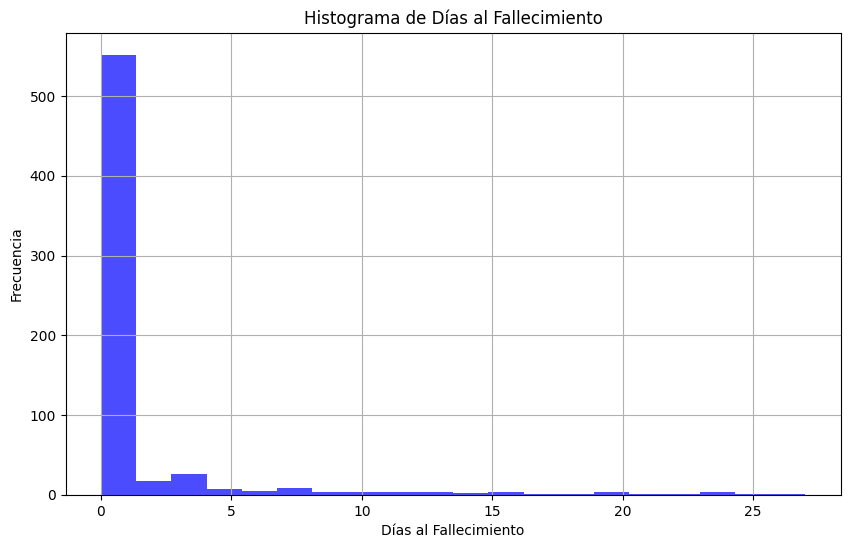

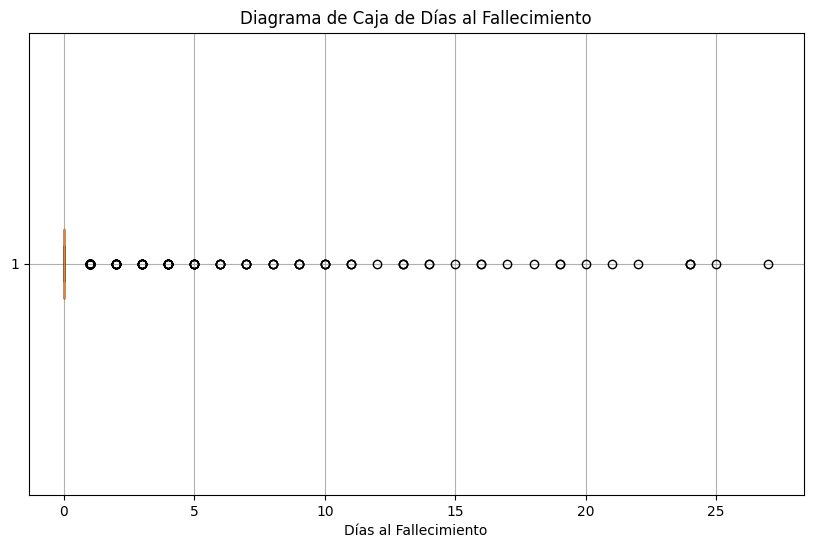

In [49]:
# Se filtran los valores "SD" (sin datos) antes de graficar
dfFechaFallecimiento = df2[df2["DIAS_AL_FALLECIMIENTO"] != "SD"]

# Se convierte la columna "DIAS_AL_FALLECIMIENTO" a tipo de dato numérico
dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"] = pd.to_numeric(dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"], errors="coerce")

# Se crea un histograma para visualizar la distribución de días al fallecimiento
plt.figure(figsize=(10, 6))
plt.hist(dfFechaFallecimiento["DIAS_AL_FALLECIMIENTO"], bins=20, color="blue", alpha=0.7)
plt.xlabel("Días al Fallecimiento")
plt.ylabel("Frecuencia")
plt.title("Histograma de Días al Fallecimiento")
plt.grid(True)
plt.show()

# Se crea un diagrama de caja para visualizar la distribución y los valores atípicos
plt.figure(figsize=(10, 6))
plt.boxplot(dfFechaFallecimiento['DIAS_AL_FALLECIMIENTO'], vert=False)
plt.xlabel('Días al Fallecimiento')
plt.title('Diagrama de Caja de Días al Fallecimiento')
plt.grid(True)
plt.show()

#### Se exporta a CSV

In [50]:
# Con los pasos anteriores completos se exporta a formato CSV y se termina el ETL.

df2.to_csv("VICTIMAS.csv", index=False)

In [3]:
df2 = pd.read_csv("VICTIMAS.csv")

## ANALISIS

Una vez terminado el proceso de ETL  se hace un describe al dataframe para ver si tiene algun tipo de patrón que podamos conocer

In [7]:
df = pd.read_csv("homicidios.csv")

In [8]:
df.describe()

,N_VICTIMAS,AAAA,MM,DD,COMUNA,pos x,pos y
count,696.000000,696.000000,696.000000,696.000000,696.000000,684.000000,684.000000
mean,1.030172,2018.188218,6.692529,15.936782,7.425287,-58.441545,-34.619632
std,0.179393,1.683754,3.571309,8.639646,4.387050,0.046144,0.035289
min,1.000000,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017.000000,4.000000,9.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018.000000,7.000000,16.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020.000000,10.000000,23.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021.000000,12.000000,31.000000,15.000000,-58.356082,-34.534654


### Numero de victimas

Primero se quiere saber el numero de victimas totales por año para empezar a conocer la problematica.
Despues se piensa ver el número de victimas por año para saber como se distribuyen en el tiempo.

In [9]:
cantidad_victimas_total = df["N_VICTIMAS"].sum()
cantidad_victimas_total

717

Se puede ver que son diferentes los valores al describe en número de victimas con el número obtenido por lo que se busca saber cuales son los datos unicos.

In [56]:
# Se buscan los valores unicos y se puede ver que hay hasta 3 victimas por siniestro
df["N_VICTIMAS"].unique()

array([1, 2, 3], dtype=int64)

### VICTIMAS POR AÑO

In [ ]:
df.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97


Con la informacíon anterior se puede ver que hay un numero de victimas que sube y baja por lo que es dificil determinar su tendencia aun asi, hubo una mejora significativa de 2019 a 2020, por lo que se procede a graficar.

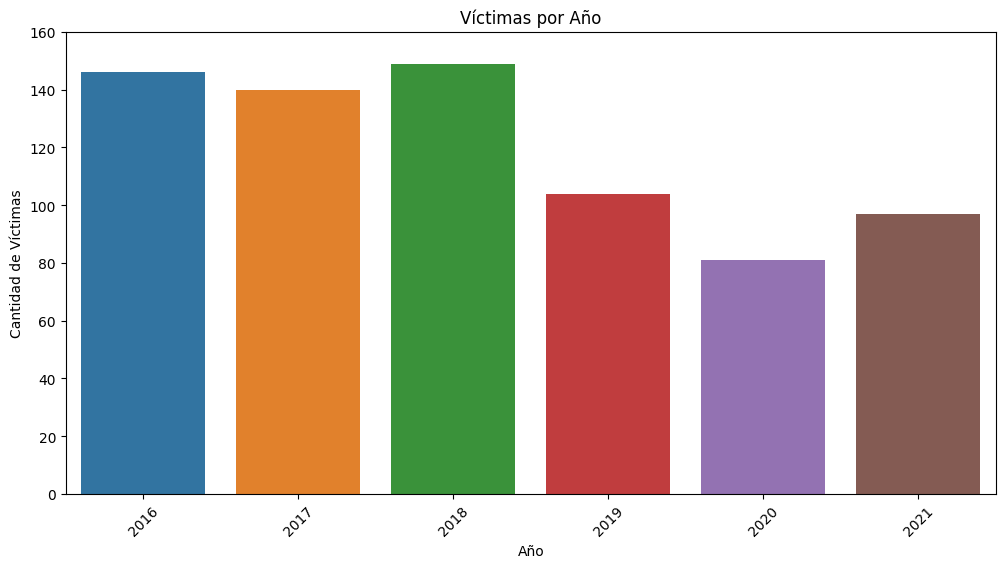

In [57]:
suma_victimas_por_año = df.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_año, x="AAAA", y="N_VICTIMAS")
plt.title("Víctimas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 160)
plt.show()

Se observa una bajada drastica en el número de victimas de 2018 a 2019 y que continua la tendencia a 2018, se piensa que esto se puede deber a la pandemia por COVID ya que coincide con esas fechas.
Ademas de que la tendencia del 2020 al 2021 es a la alza.

#### VICTIMAS POR SEMESTRE DE CADA AÑO

Se crea una columna que incluye el número de victimas por semestre, ya que muchas veces el periodo de tiempo de un año es muy extenso por lo que se busca conocer si hay un cambio semestral del numero de victimas.

In [10]:

def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2


df["Semestre"] = df["MM"].apply(determinar_semestre)

In [11]:
df.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()

,AAAA,Semestre,N_VICTIMAS
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


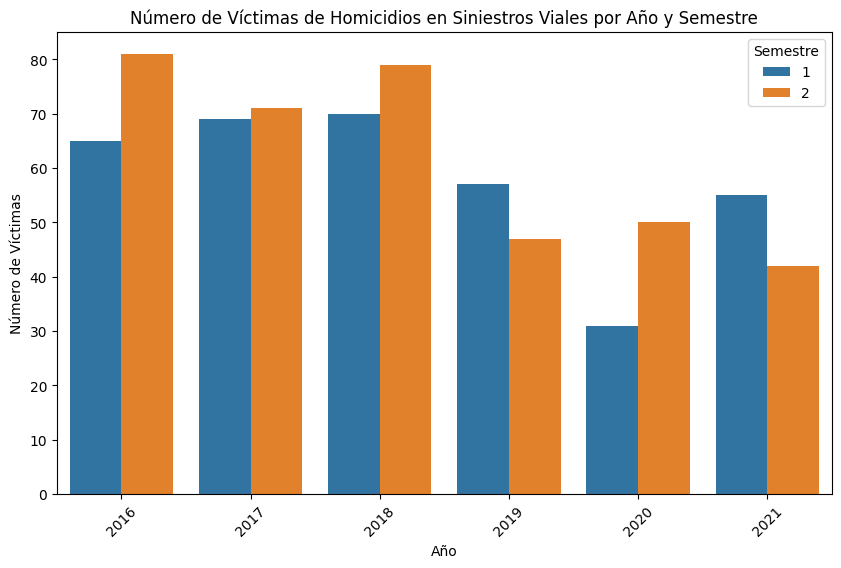

In [12]:
df_agregado = df.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agregado, x="AAAA", y="N_VICTIMAS", hue="Semestre")
plt.title("Número de Víctimas de Homicidios en Siniestros Viales por Año y Semestre")
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.xticks(rotation=45)
plt.legend(title="Semestre")
plt.show()

### Calle más peligrosa

Se busca conocer cual es la calle más peligrosa para saber si esta nos ayuda a entender si los siniestros son aislados o ocurren en un solo lugar.

In [13]:
calle_mas_peligrosa = df["Calle"].value_counts()
calle_mas_peligrosa 

Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64

La calle más peligrosa es general Paz ya que tiene un mayor numero de muertes, esto abre la duda si esta calle es muy grande o simplemente es peligrosa por lo que se busca conocer más sobre la distribución geografica de los siniestros.

### Mapeo de los accidentes

Se plante utilizar las coordenadas para observar si los siniestros estan aislados en un punto o distribuidos por lo que se utiliza la libreria de geopandas y la columna XY CABA para conocer esta distribución.

In [14]:
# Se generauna función que ayuda a convertir las coordenadas recibidas en un formato que geopandas pueda leer
def convert_to_geometry(coord):
    try:
        geometry = loads(coord)
        return geometry
    except Exception as e:
        return None

# Se genera una columna nueva que nos servira para recibir el tipo de dato
df["geometry"] = df["XY (CABA)"].apply(convert_to_geometry)



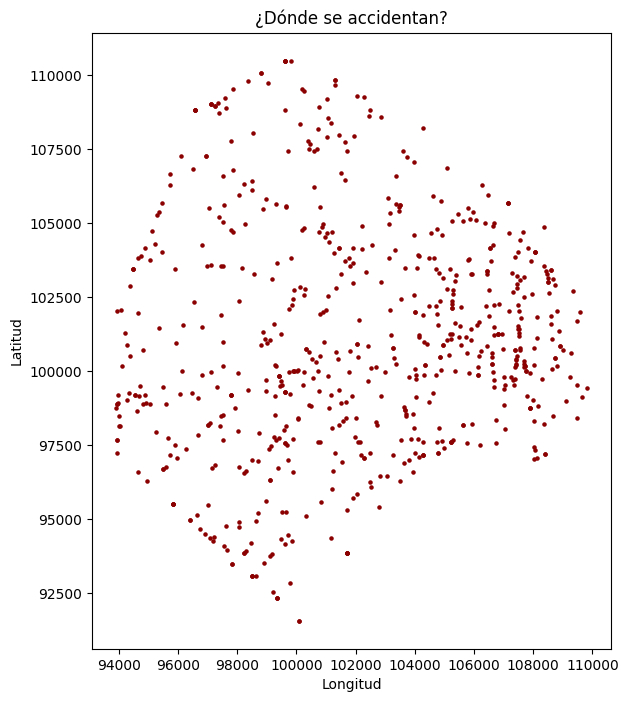

In [16]:
# Se genera la grafica
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf.plot(marker="o", color="darkred", markersize=5, figsize=(8, 8))
plt.title("¿Dónde se accidentan?")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Viendo la grafica se puede apreciar que se tiene una distribución de sinniestros sin patrón aparente

In [18]:
# Se genera un filtro para la calle General Paz
df_Gen_Paz = df[df["Calle"]== "PAZ, GRAL. AV."]

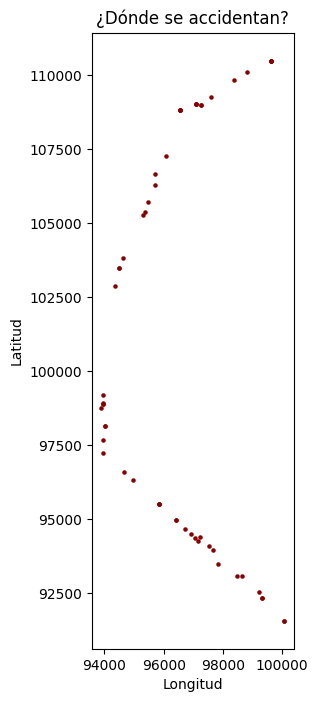

In [19]:
# Se genera una grafica para el filtro
gdf = gpd.GeoDataFrame(df_Gen_Paz, geometry="geometry")
gdf.plot(marker="o", color="darkred", markersize=5, figsize=(8, 8))
plt.title("¿Dónde se accidentan?")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Se puede ver que la calle general paz atravieza todo el mapa por latitud por lo que se plantea revisar la distribución por comunas, tal vez eso nos de mayor información. 

### Numero de Victimas por Comuna

La ciudad autonoma de Buenos Aires esta dsitribuida en comunas por lo que saber cual tiene mayor letalidad puede ayudarnos a conocer más aun la problematica.

In [63]:
# Se genera un filtro que nos ayude a saber el numero de victimas por comuna.
df.groupby(["COMUNA"])["N_VICTIMAS"].sum().reset_index()

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


Se puede ver que hay una comuna marcada con 0, ya que no nos afecta para el analisis por la poca cantidad de datos que contiene, se elimina para evitar conflictos en el analisis.

In [64]:
# Se elimina la comuna 0
df.drop(df[df["COMUNA"] == 0].index, inplace=True)

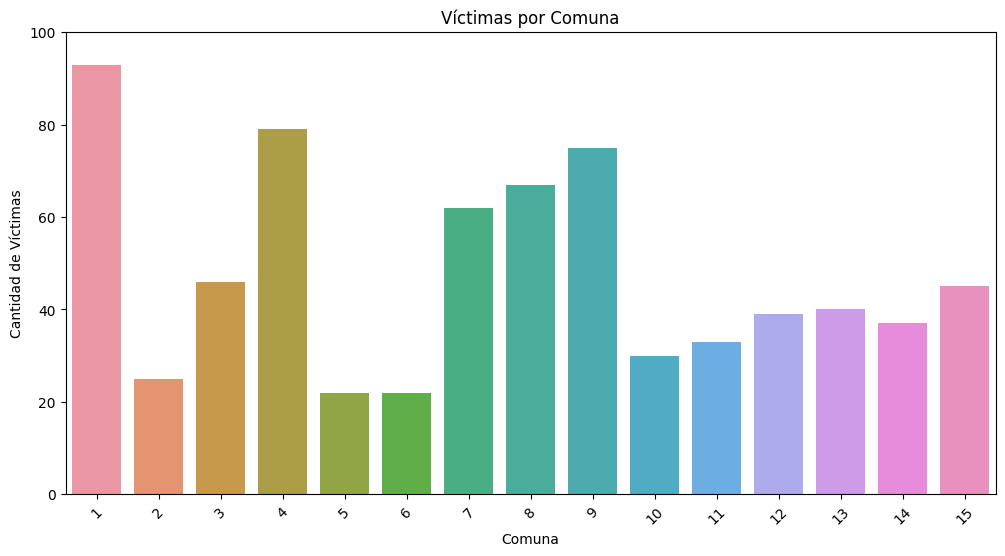

In [65]:
# Se genera una grafica que nos ayude a entender mejor los datos
suma_victimas_por_comuna = df.groupby("COMUNA")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_comuna, x="COMUNA", y="N_VICTIMAS")
plt.title("Víctimas por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Se puede ver claramente que la comuna con mayor número de victimas es la comuna 1, seguida de la 4 y la nueve. Se cree que la calle más peligrosa tiene que pasar por aqui por lo que se genera una comparativa. 

Se utiliza el dataframe creado para el mapa para conocer la respuesta

In [67]:
df_Gen_Paz["COMUNA"].unique()

array([ 9,  8, 13, 12, 11], dtype=int64)

Viendo el resultado anterior se puede saber que la calle mas letal no esta en la comuna más letal.

### Letalidad de comuna por año

Se quiere saber que comuna es mas peligrosa en el tiempo por lo que se plantea con una grafica descubrir si la comuna más peligrosa cambia con el tiempo.

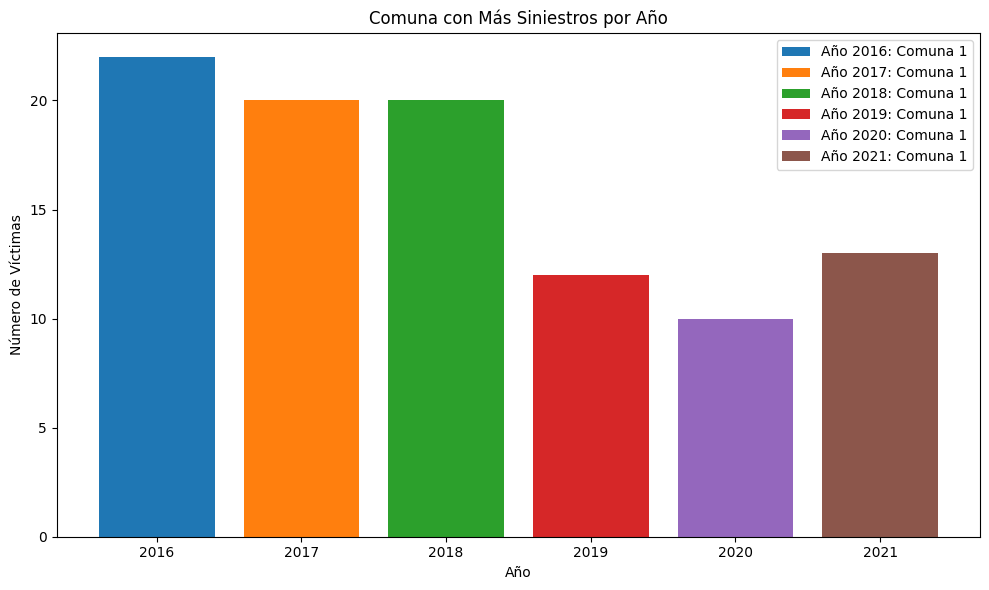

In [69]:
agrupado_por_anio_comuna = df.groupby(["AAAA", "COMUNA"])["N_VICTIMAS"].sum().reset_index()

# Inicializa la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Itera a través de cada año para encontrar el mes con más siniestros
for year in agrupado_por_anio_comuna["AAAA"].unique():
    df_year_new = agrupado_por_anio_comuna[agrupado_por_anio_comuna["AAAA"] == year]
    max_comuna = df_year_new.loc[df_year_new["N_VICTIMAS"].idxmax()]["COMUNA"]
    max_victims = df_year_new["N_VICTIMAS"].max()
    ax.bar(str(year), max_victims, label=f"Año {year}: Comuna {max_month}")

# Configura etiquetas y título
ax.set_xlabel("Año")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Comuna con Más Siniestros por Año")
ax.legend()

# Muestra el gráfico
plt.tight_layout()
plt.show()

### Tamaño de las comunas

Despues de ver que la comuna 1 es la más peligrosa todos los años se piensa que debe tener una amplia extension territorial y ese debe ser el motivo de porque tiene tantos accidentes viales por lo que se busco información relacionada a ello.

Se obtuvieron datos de wikipedia para conocer el tamaño de las comunas de la siguiente dirección 
https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires

Con ello se quiere contrastar el tamaño de las comunas con su letalidad.

In [70]:
df3 = pd.read_excel("superficieComunas.xlsx")
df3

,Comuna,Año creación,Origen,Población (2010),Superficie (km²),Barrios,Códigos INDEC:
0,Comuna 1,2005,A partir de la sanción de la Ley 1777,205 886,17.4,"Retiro, San Nicolás, Puerto Madero,",02007/ 022007
1,Comuna 2,2005,A partir de la sanción de la Ley 1777,157 932,6.1,Recoleta,02014/ 022014
2,Comuna 3,2006,A partir de la sanción de la Ley 1777,187 537,6.4,San Cristóbal y,02021/ 022021
3,Comuna 4,2005,A partir de la sanción de la Ley 1777,218 245,21.6,"Boca, Barracas,",02028/ 022028
4,Comuna 5,2005,A partir de la sanción de la Ley 1777,179 005,6.7,Almagro y,02035/ 022035
5,Comuna 6,2005,A partir de la sanción de la Ley 1777,176 076,6.8,Caballito,02042/ 022042
6,Comuna 7,2005,A partir de la sanción de la Ley 1777,220 591,12.4,Flores y,02049/ 022049
7,Comuna 8,2005,A partir de la sanción de la Ley 1777,187 237,21.9,"Villa Soldati, Villa Riachuelo y",02056/ 022056
8,Comuna 9,2005,A partir de la sanción de la Ley 1777,161 797,16.8,"Parque Avellaneda, Liniers y",02063/ 022063
9,Comuna 10,2005,A partir de la sanción de la Ley 1777,166 022,12.7,"Villa Real, Monte Castro, Versalles,",02070/ 022070


In [71]:
# Se quitan las columnas que no seran utilizadas
df3 =df3.drop(["Códigos INDEC:", "Año creación", "Origen", "Barrios"], axis=1)

In [72]:
# Se ordenan las comunas por superficie.
df3.sort_values(by="Superficie (km²)", ascending=False).reset_index()

,index,Comuna,Población (2010),Superficie (km²)
0,7,Comuna 8,187 237,21.9
1,3,Comuna 4,218 245,21.6
2,0,Comuna 1,205 886,17.4
3,8,Comuna 9,161 797,16.8
4,13,Comuna 14,225 970,15.8
5,11,Comuna 12,200 116,15.6
6,12,Comuna 13,231 331,14.6
7,14,Comuna 15,182 574,14.3
8,10,Comuna 11,189 832,14.1
9,9,Comuna 10,166 022,12.7


In [ ]:
# Se exporta a formato CSV para su uso posterior
df3.to_csv("superficieComunas.csv", index=False)

Se puede ver que la comuna 1 no es la más grande ni tampoco la que tiene mayor densidad de población por lo que el motivo de que sea la más letal no tiene que ver con su superficie ni con la población.

#### Analisis de General Paz en el tiempo

Se habia encontrado que la avenida General Paz es la más peligrosa y esto se debe a que atravieza muchas Comunas, entonces se busaca saber si las muertes se han reducido a lo largo de los años o si se mantienen constantes.

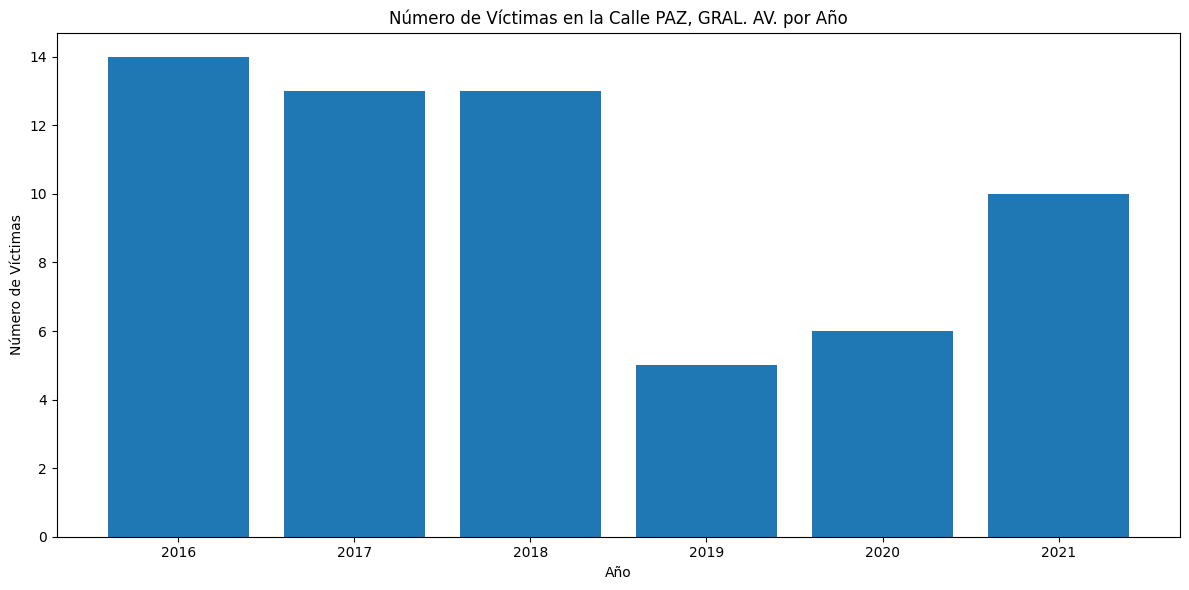

In [20]:
# Se filtra el DataFrame para obtener las filas donde 'Calle' sea igual a 'PAZ, GRAL. AV.'
df_Gen_Paz = df[df["Calle"] == "PAZ, GRAL. AV."]

# Se agrupa por año y se calcula el numero de victimas anual
grupo_anio = df_Gen_Paz.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

# Se crea un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
plt.bar(grupo_anio["AAAA"], grupo_anio["N_VICTIMAS"])
plt.xlabel("Año")
plt.ylabel("Número de Víctimas")
plt.title("Número de Víctimas en la Calle PAZ, GRAL. AV. por Año")

# Para mostrar el gráfico
plt.tight_layout()
plt.show()

Los datos son muy parecidos a la distribución anual de siniestros.

Se puede ver que aporta a la cantidad de personas que mueren al año pero no es el factor principal.

### Más analsis cronologicos

Despues de verificar algunos planteamientos que tienen que ver con el tiempo y la geografia se quiere profundizar un poco más en si algunas otras variables temporales afectan la cantidad de victima como alguna hora del día en especial o algun mes en particular.

#### Número de victimas por hora del día

Se piensa que la hora del día puede estar relacionada con el número de siniestros debido a la movilidad en la ciudad

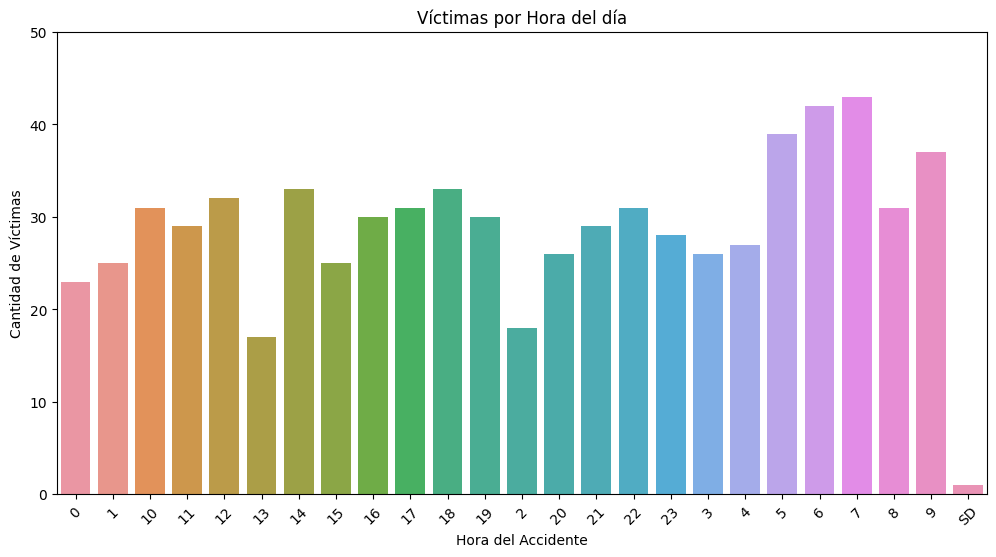

In [21]:
suma_victimas_por_hora = df.groupby("HH")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_hora, x="HH", y="N_VICTIMAS")
plt.title("Víctimas por Hora del día")
plt.xlabel("Hora del Accidente")
plt.ylabel("Cantidad de Víctimas")
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.show()

Aunque la distribucion de cantidad de victimas por hora esta distribuida en todas horas, se puede ver que entre 6 y 7 se encuentra el mayor numero de victimas lo cual coincide a las horas en las que la gente se desplaza al trabajo.

Aún asi no es una diferencia muy grande.

#### Victimas por mes cada año

Se quiere saber si hay meses en donde ocurran más acidentes ya se piensa que esto nos puede ayudar a entender mejor el pirque de los siniestros.

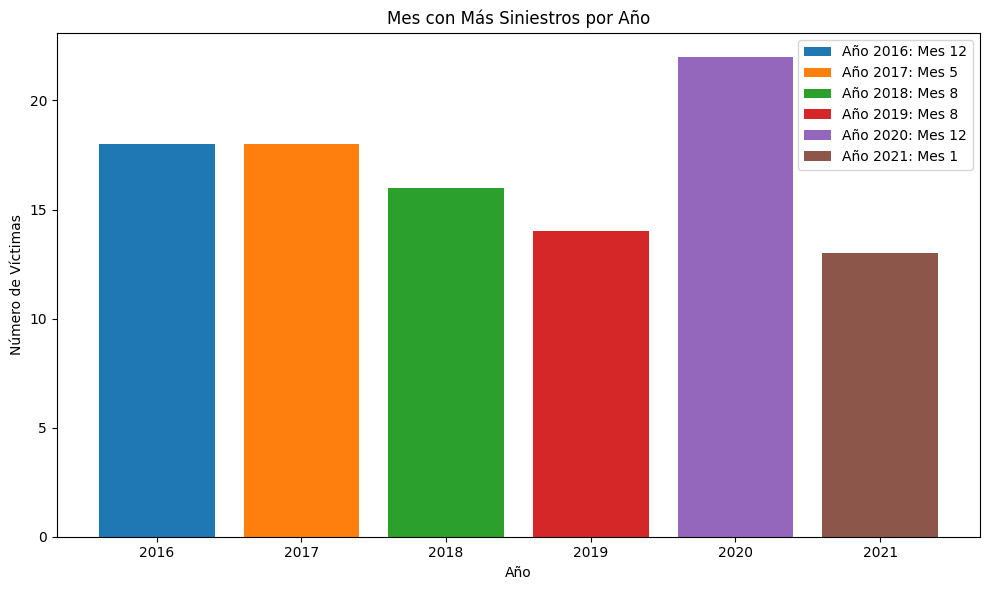

In [68]:
# Se genera un dataframe para el filtro
agrupado_por_anio_mes = df.groupby(["AAAA", "MM"])["N_VICTIMAS"].sum().reset_index()

# Inicializa la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Itera a través de cada año para encontrar el mes con más siniestros
for year in agrupado_por_anio_mes["AAAA"].unique():
    df_year = agrupado_por_anio_mes[agrupado_por_anio_mes["AAAA"] == year]
    max_month = df_year.loc[df_year["N_VICTIMAS"].idxmax()]["MM"]
    max_victims = df_year["N_VICTIMAS"].max()
    ax.bar(str(year), max_victims, label=f"Año {year}: Mes {max_month}")

# Configura etiquetas y título
ax.set_xlabel("Año")
ax.set_ylabel("Número de Víctimas")
ax.set_title("Mes con Más Siniestros por Año")
ax.legend()

# Muestra el gráfico
plt.tight_layout()
plt.show()

Se puede ver que los meses más peligrosos son diciembre y Agosto, siendo diciembre el més que tiene mayor letalidad por año. Siendo diciembre del 2020 el año con más letalidad pero al ser numeros pequeños esto puede ser por motivo de accidentes multiples y no de otra causa.

### Victimas por Acusado

Se quiere saber que tipo de vehiculo o motivo causa la mayor cantidad de siniestros por lo que se busca agrupar al tipo de victima por acusado.

Esto nos permite saber tambien a que tipo de personas tiene mayor propencion a morir en un accidente vial.

<Figure size 1200x600 with 0 Axes>

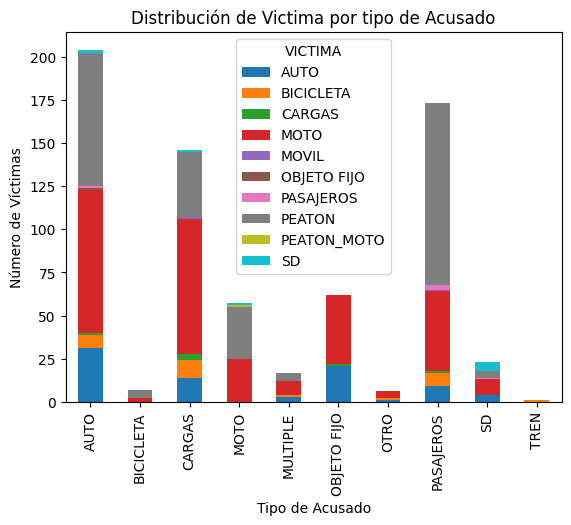

In [33]:
tabla_acusados = df.pivot_table(index="ACUSADO", columns="VICTIMA", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
tabla_acusados.plot(kind="bar", stacked=True)
plt.title("Distribución de Victima por tipo de Acusado")
plt.xlabel("Tipo de Acusado")
plt.ylabel("Número de Víctimas")
plt.show()

In [34]:
tabla_acusados

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,OBJETO FIJO,PASAJEROS,PEATON,PEATON_MOTO,SD
ACUSADO,,,,,,,,,,
AUTO,31,8,1,83,0,1,1,77,0,2
BICICLETA,0,0,0,2,0,0,0,5,0,0
CARGAS,14,10,4,78,1,0,0,38,0,1
MOTO,0,0,0,25,0,0,0,30,1,1
MULTIPLE,3,1,0,8,0,0,0,5,0,0
OBJETO FIJO,21,0,1,40,0,0,0,0,0,0
OTRO,1,1,0,4,0,0,0,0,0,0
PASAJEROS,9,8,1,46,1,0,3,105,0,0
SD,4,0,0,9,0,0,1,4,0,5


Se puede observar que las motos y los peatones son las personas más propensas a morir en un accidente vial, ademas de que los autos, vehiculos de cargas y de transporte son los que más muertes causan.

Tambien se puede ver que el tren es el que menor cantidad de muertes a causado.

### Tipo de calle

Se piensa que el tipo de calle puede influir en la cantidad de muertes que se presentan por lo que se decidió ver que información se puede obtener de este enfoque.

<Figure size 1200x600 with 0 Axes>

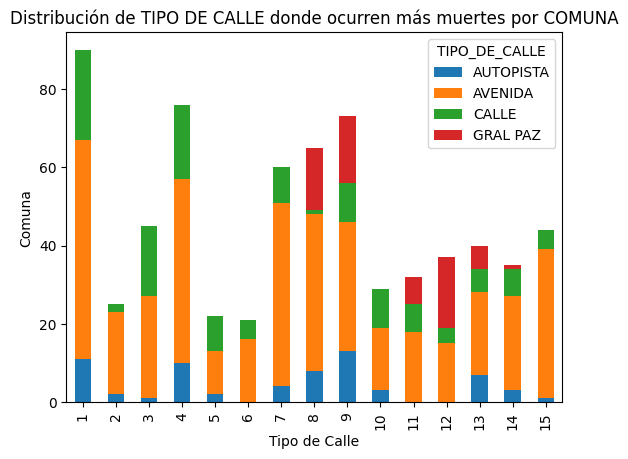

In [241]:
pivot_table_3 = df.pivot_table(index="COMUNA", columns="TIPO_DE_CALLE", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
pivot_table_3.plot(kind="bar", stacked=True)
plt.title("Distribución de TIPO DE CALLE donde ocurren más muertes por COMUNA")
plt.xlabel("Tipo de Calle")
plt.ylabel("Comuna")
plt.show()

Se observa que la comuna 1 tiene un mayor numero de calles, de entre estas calles avenidas por lo que podemos concluir que al ser más grande, tiene mayor probabilidad de causar accidentes.

### Victimas por Sexo 

Se busco si el sexo de las victimas jugaba un rol importante ya que se quiere conocer bien si esto afecta de alguna forma la posibilidad de morir en un siniestro vial.

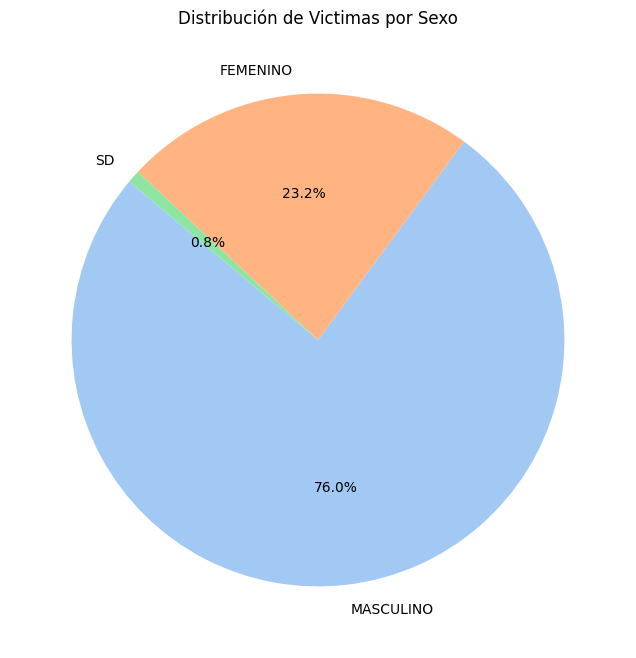

In [12]:
# Contar la cantidad de cada sexo
conteo_sexo = df2["SEXO"].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Añadir un título
plt.title("Distribución de Victimas por Sexo")

# Mostrar la gráfica
plt.show()

Se puede ver claramente que la mayoria de las victimas son hombres, casi el 80% lo cual indica que hay una mayor probabilidad de accidentarte si eres hombre. Se quiere ver si el rol de las victimas tiene algo que ver con esa distribución.

In [14]:
# Se crea una tabla entre 'VICTIMA', 'ROL' y 'SEXO'
tabla_sexo = pd.crosstab([df2["VICTIMA"], df2["ROL"]], df2["SEXO"])

tabla_sexo

SEXO                            FEMENINO  MASCULINO  SD
VICTIMA   ROL                                          
AUTO      CONDUCTOR                    5         60   0
          PASAJERO_ACOMPAÑANTE        10         19   0
BICICLETA CICLISTA                     8         21   0
CARGAS    CONDUCTOR                    0          3   0
          PASAJERO_ACOMPAÑANTE         0          4   0
MOTO      CONDUCTOR                   15        244   2
          PASAJERO_ACOMPAÑANTE        20         19   0
          SD                           1          1   1
MOVIL     CONDUCTOR                    0          1   0
          PASAJERO_ACOMPAÑANTE         0          2   0
PASAJEROS PASAJERO_ACOMPAÑANTE         3          2   0
PEATON    PEATON                     103        163   1
SD        PASAJERO_ACOMPAÑANTE         1          0   0
          SD                           0          6   2

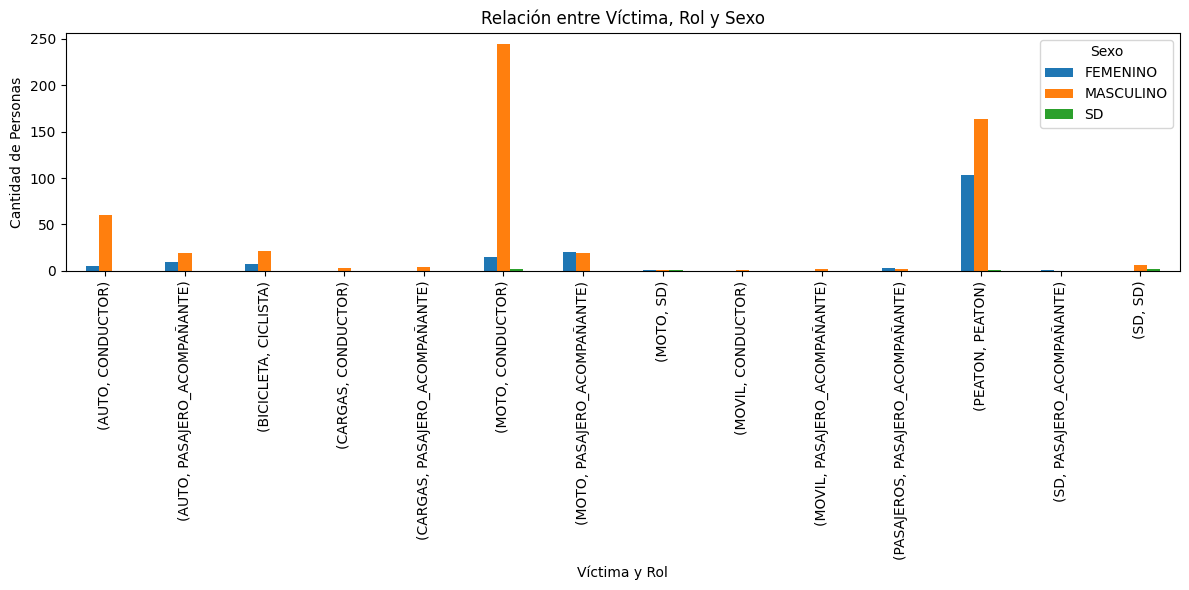

In [15]:
# Se crea un gráfico de barras agrupadas
tabla_sexo.plot(kind="bar", figsize=(12, 6))

# Se configuran las etiquetas y el título
plt.xlabel("Víctima y Rol")
plt.ylabel("Cantidad de Personas")
plt.title("Relación entre Víctima, Rol y Sexo")

# Se muestra el gráfico
plt.tight_layout()
plt.legend(title="Sexo")

plt.show()

Claramente se puede ver que la mayoria de las victimas son hombres conductores de moto. Esto nos indica que son el grupo que es más propenso a tener accidentes y que al disminuir la cantidad de accidentes se pueden disminuir la cantidad de muertes que les ocurren.

Entonces se quiere saber el porcentaje de hombres y mujeres en moto que mueren en siniestros viales.

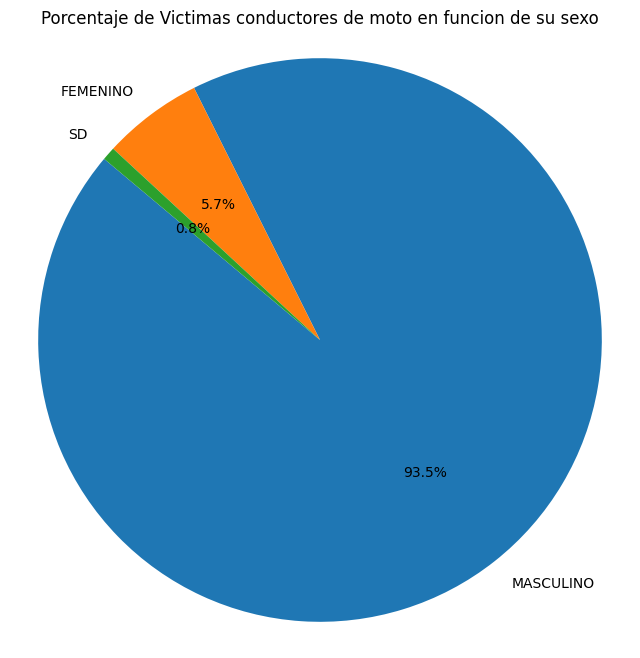

In [16]:
condiciones1 = (df2["VICTIMA"] == "MOTO") & (df2["ROL"] == "CONDUCTOR")
df_filtrado = df2[condiciones1]
porcentaje_sexo = df_filtrado["SEXO"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_sexo, labels=porcentaje_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title("Porcentaje de Victimas conductores de moto en funcion de su sexo")
plt.axis("equal")  # Para asegurarse de que el gráfico sea un círculo
plt.show()

### Edad de las Victimas

Se desea saber si la edad de las victimas tiene que ver con la probabilidad de morir en un siniestro vial.

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_17772\3145367267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['EDAD'] = pd.to_numeric(df_filtrado['EDAD'], errors='coerce')


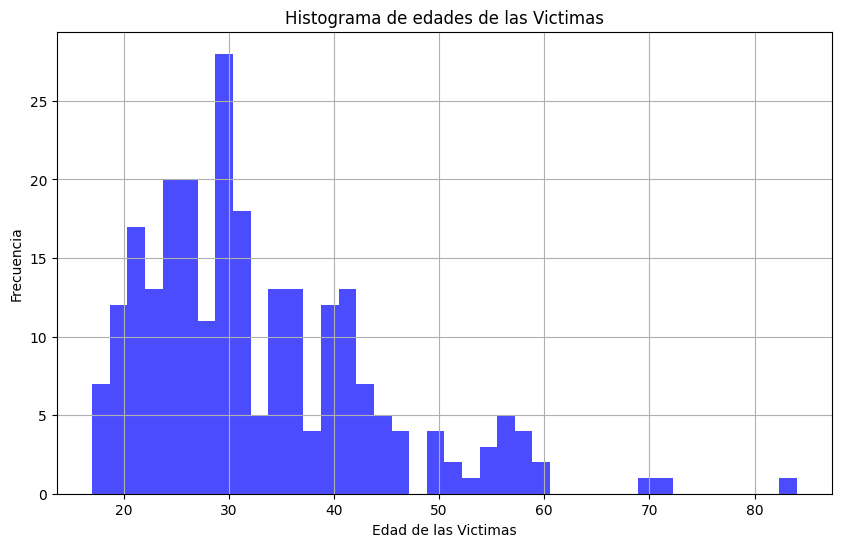

In [22]:
# Se filtran los valores de edad quitando los que no tienen datos
df_edad = df2[df2["EDAD"] != "SD"]

# Se convierten los valores de la columna edad a numericos por si hay algun error
df_filtrado["EDAD"] = pd.to_numeric(df_filtrado["EDAD"], errors="coerce")

# Crea un histograma para visualizar la distribución de días al fallecimiento
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado["EDAD"], bins=40, color="blue", alpha=0.7)
plt.xlabel("Edad de las Victimas")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades de las Victimas")
plt.grid(True)
plt.show()


Valdria la pena hacer el analisis de rol contra edad con los datos anteriores ya que se observa que la mayoria son personas de 20 a 40 años y se tiene la hipotesis de que son conductores de motocicleta.

Para ello se debe segmentar las edades para poder hacer un mejor analisis, más completo

In [26]:
# Se remplazan los valores SD por menos uno para evitar errores de tipo
df2["EDAD"].replace("SD", -1, inplace=True)
# Se remplaza el tipo de datos de EDAD a enteros
df2["EDAD"] = df2["EDAD"].astype(int)
# Se generan la columna con los segmentos de edad
df2["EDAD_SEGMENTADA"] = pd.cut(df2["EDAD"], bins=[0, 20, 40, 60, 80, 100], labels=["0-19", "20-39", "40-59", "60-79", "80-100"])


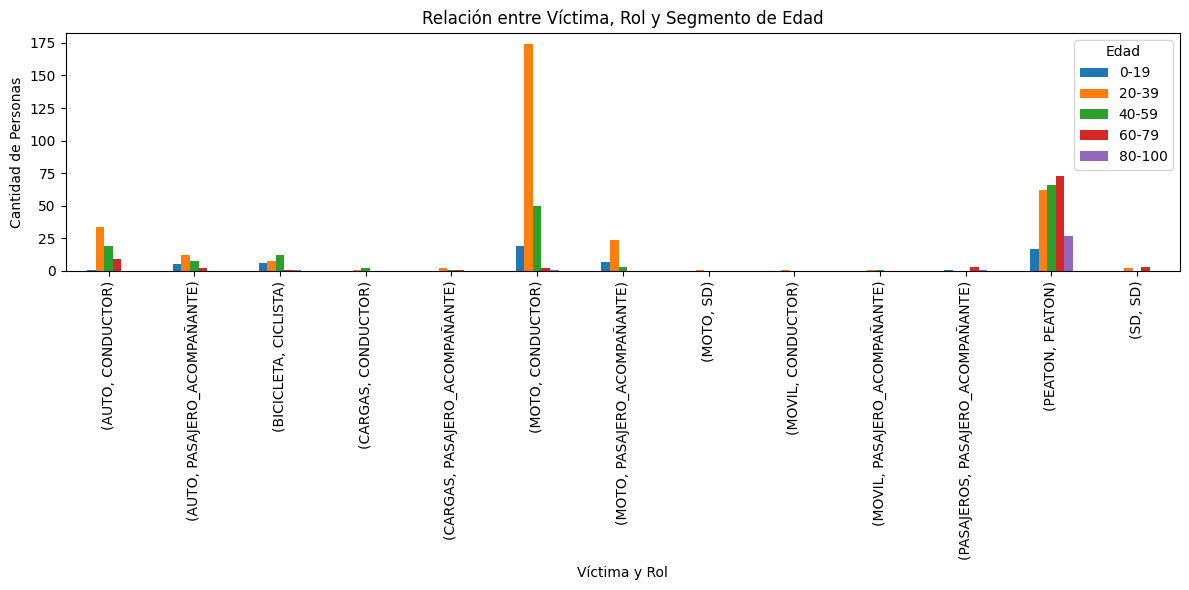

In [27]:
# Se crea una tabla entre las columnas Victima, Rol y Edad segmentada
tabla_rol_edad = pd.crosstab([df2["VICTIMA"], df2["ROL"]], df2["EDAD_SEGMENTADA"])

# Se crea un gráfico de barras agrupadas
tabla_rol_edad.plot(kind="bar", figsize=(12, 6))

# Se configuran etiquetas y título
plt.xlabel("Víctima y Rol")
plt.ylabel("Cantidad de Personas")
plt.title("Relación entre Víctima, Rol y Segmento de Edad")

# Muestra el gráfico
plt.tight_layout()
plt.legend(title="Edad")
plt.show()

Se puede observar claramente que la mayoria de las victimas los conductores de moto son en mayoria adultos jovenes de 20-39.

Lo cual suguiere fuertemente que el manejar de forma imprudente puede ser el motivo de porque hay tantos accidentes viales.

### Gravedad del accidente

Se quiere saber que tan fatales son los accidentes por edad por lo que, se deben segmentar los dias al fallecimiento para mejorar la legibilidad del analisis

In [31]:
df2["DIAS_AL_FALLECIMIENTO"].replace("SD", -1, inplace=True)
df2["DIAS_AL_FALLECIMIENTO"] = df2["DIAS_AL_FALLECIMIENTO"].astype(int)
df2["FALLECIMIENTO_SEGMENTADO"] = pd.cut(df2["DIAS_AL_FALLECIMIENTO"], bins=[2, 5, 8, 11, 14, 17, 20, 23, 26], labels=["0-2 dias", "3-5 dias", "6-9 dias", "10-12 dias", "13-15 dias", "16-18 dias", "19-21 dias", "de 22 a más dias"])

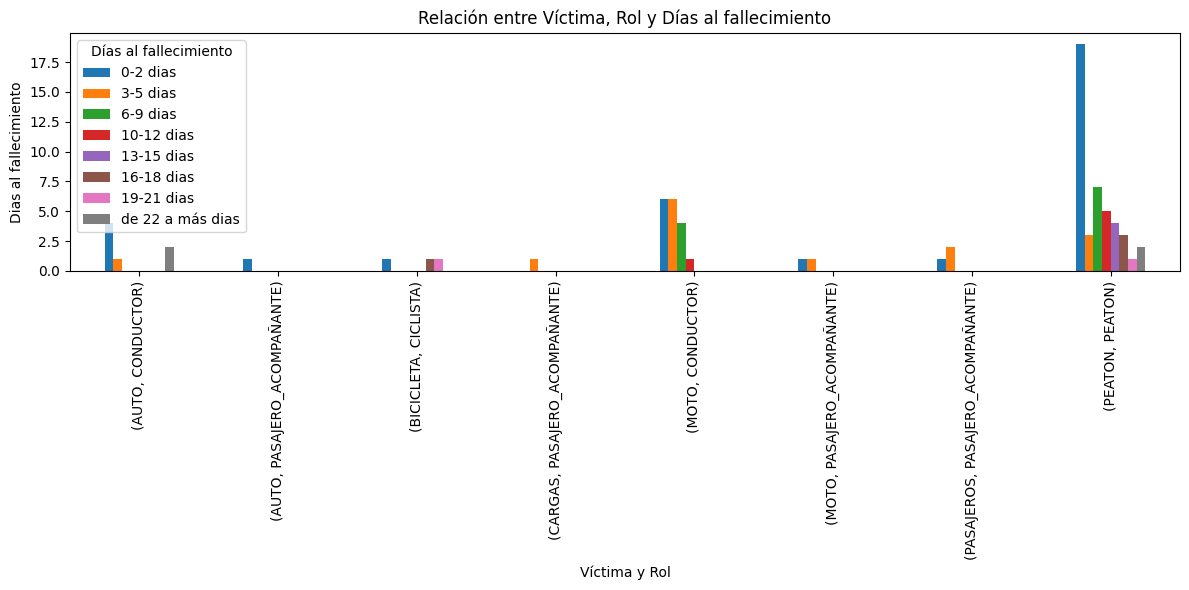

In [32]:
# Filtra los valores 'SD' (sin datos) antes de graficar
df_filtrado= df2[df2["FALLECIMIENTO_SEGMENTADO"] != "SD"]

# Crea una tabla de contingencia entre 'VICTIMA', 'ROL' y 'DIAS_AL_FALLECIMIENTO'
tabla_contingencia = pd.crosstab([df2["VICTIMA"], df2["ROL"]], df2["FALLECIMIENTO_SEGMENTADO"])

# Crea un gráfico de barras agrupadas
tabla_contingencia.plot(kind="bar", figsize=(12, 6))

# Configura etiquetas y título
plt.xlabel("Víctima y Rol")
plt.ylabel("Dias al fallecimiento")
plt.title("Relación entre Víctima, Rol y Días al fallecimiento")

# Muestra el gráfico
plt.tight_layout()
plt.legend(title="Días al fallecimiento")
plt.show()

Se puede ver que los siniestros más graves les ocurren a peatones ya que la muerte suele ser inmediata pero tiene todo el espectro edades, mientras que los ciclistas y los conductores de auto son los que más tardan en morir segun el tipo de accidente.

### Influencia de los Cruces

Se quiere saber si los cruces tienen que ver con el numero de personas que mueren y de ser así que rol tienen en los accidentes

In [74]:
# Se generan las mascaras necesarias para saber el numero de victimas si hay o no cruce
victimas_con_cruce_true = df[df["Hay Cruce"] == True]["N_VICTIMAS"].sum()
victimas_con_cruce_false = df[df["Hay Cruce"] == False]["N_VICTIMAS"].sum()

print(f"Cantidad de víctimas cuando CRUCE es True: {victimas_con_cruce_true}")
print(f"Cantidad de víctimas cuando CRUCE es False: {victimas_con_cruce_false}")

Cantidad de víctimas cuando CRUCE es True: 540
Cantidad de víctimas cuando CRUCE es False: 175


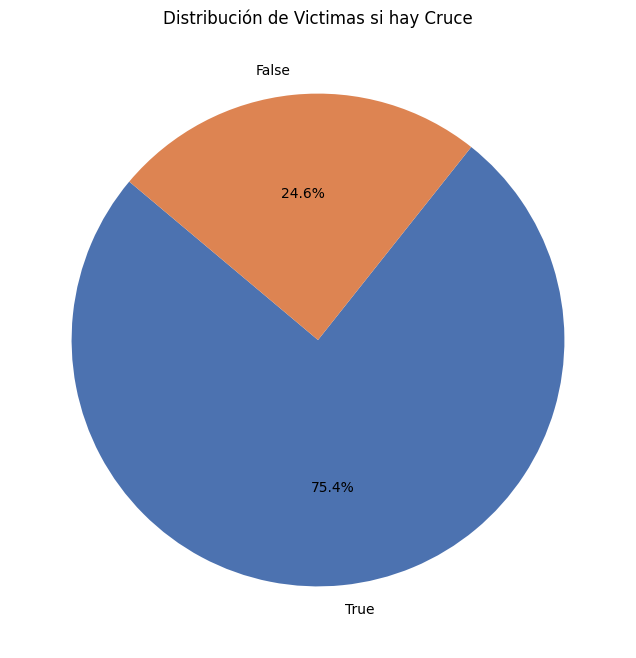

In [69]:
# Se genera una grafica para conocer el porcentaje de victimas que hay dependiendo si existe Cruce

# Contar la cantidad de cada sexo
conteo_cruce = df["Hay Cruce"].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_cruce, labels=conteo_cruce.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("deep"))

# Añadir un título
plt.title("Distribución de Victimas si hay Cruce")

# Mostrar la gráfica
plt.show()

Se puede ver claramente que la existencia de cruces aumenta mucho la cantidad de victimas.
Se desea ver que tipo de victima aumenta mayormente en los cruces ya que podria ser de utilidad para saber si se requiere invertir más en infraestructura.

In [9]:
#Se unen los dataframes para poder obtener la información.

df2.rename(columns={"ID_hecho": "ID"}, inplace=True)

df_merged = df.merge(df2, on="ID")

columnas_a_eliminar = ["FECHA_x", "AAAA_x", "MM_x", "DD_x", "VICTIMA_x"]
df_merged = df_merged.drop(columns=columnas_a_eliminar)


In [49]:
# Se genera un filtro para ver los roles de las personas cuando hay cruces y el número de victimas
filtro_cruce_si1 = df_merged[df_merged["Hay Cruce"] == True]
muertes_por_rol = filtro_cruce_si1[filtro_cruce_si1["N_VICTIMAS"] > 0].groupby("ROL")["N_VICTIMAS"].count()
print(muertes_por_rol)

ROL
CICLISTA                 18
CONDUCTOR               247
PASAJERO_ACOMPAÑANTE     63
PEATON                  208
SD                        4
Name: N_VICTIMAS, dtype: int64


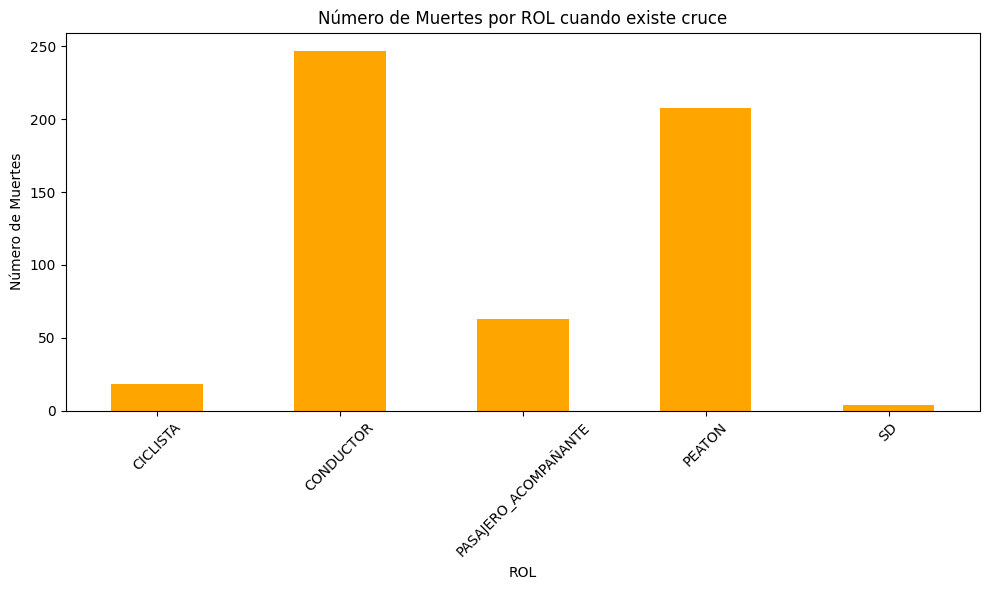

In [50]:
# Crea un gráfico de barras para mostrar el número de muertes por ROL
plt.figure(figsize=(10, 6))
muertes_por_rol.plot(kind="bar", color="orange")
plt.xlabel("ROL")
plt.ylabel("Número de Muertes")
plt.title("Número de Muertes por ROL cuando existen Cruces")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede ver que el conductor es el que tiene un mayor numero de muertes, se desea saber cual tipo de conductor tiene más muertes

## KPIs

Un KPI que significa indicador Clave de Proceso, son indicadores que demuestran la eficacia con la que se estan logrando objetivos clave.
Los indicadores son valores que miden el logro de objetivos generalmente en indices o porcentajes.
Los KPIs y los indicadores se diferencian en que los KPIs miden objetivos clave, no cualquier cosa.
Son diferentes de las metricas ya que las metricas son una medición de datos como tal, sin incluir un objetivo, los indices y por lo tanto los KPIs requieren de metricas pero no cualquier metrica puede ser un indice y no cualquier indice un KPI.

Los KPIs requieren estar delimitados por un tiempo especifico y un valor especifico.

Con los datos antriores se analizan algunos KPIs que se quieren observar con respecto a la letalidad en la vialidad.



         1 Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

         2 Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

         3 Reducir en un 15% la cantidad de homicidios en siniestros viales en la Comuna 1, en CABA, respecto al año anterior



### Primer KPI

Nuestro primer KPI es el siguiente:

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

    Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Para lograr esto se investigo la población total en CABA la cual es 3.120.612 habitantes (Censo 2022), segun datos oficiales tomados de [gobierno de Argentina/CABA](https://www.argentina.gob.ar/caba)


In [34]:
df_1KPI = df.groupby(["AAAA", "Semestre"])["N_VICTIMAS"].sum().reset_index()
df_1KPI["HSV"] = df_1KPI["N_VICTIMAS"]/3120612*100000
df_1KPI

,AAAA,Semestre,N_VICTIMAS,HSV
0,2016,1,65,2.082925
1,2016,2,81,2.595645
2,2017,1,69,2.211105
3,2017,2,71,2.275195
4,2018,1,70,2.243150
5,2018,2,79,2.531555
6,2019,1,57,1.826565
7,2019,2,47,1.506115
8,2020,1,31,0.993395
9,2020,2,50,1.602250


In [35]:
df_1KPI["Cambio_Porcentual"] = df_1KPI["HSV"].pct_change() * 100
df_1KPI

,AAAA,Semestre,N_VICTIMAS,HSV,Cambio_Porcentual
0,2016,1,65,2.082925,NaN
1,2016,2,81,2.595645,24.615385
2,2017,1,69,2.211105,-14.814815
3,2017,2,71,2.275195,2.898551
4,2018,1,70,2.243150,-1.408451
5,2018,2,79,2.531555,12.857143
6,2019,1,57,1.826565,-27.848101
7,2019,2,47,1.506115,-17.543860
8,2020,1,31,0.993395,-34.042553
9,2020,2,50,1.602250,61.290323


In [19]:
# Se combinan las columnas Año y Semestre en una sola columna Año_Semestre para facilitar los cálculos
df_1KPI["Año_Semestre"] = df_1KPI["AAAA"].astype(str) + "." + df_1KPI["Semestre"].astype(str)
df_1KPI["Año_Semestre"] = df_1KPI["Año_Semestre"].astype(float)


In [20]:
# Para saber en que meses se cumplio el KPI se genera la siguiente tabla filtrada
df_1KPI[df_1KPI["Cambio_Porcentual"]<-10].reset_index()

,index,AAAA,Semestre,N_VICTIMAS,HSV,Cambio_Porcentual,Año_Semestre
0,2,2017,1,69,22.111047,-14.814815,2017.1
1,6,2019,1,57,18.265648,-27.848101,2019.1
2,7,2019,2,47,15.061148,-17.543860,2019.2
3,8,2020,1,31,9.933949,-34.042553,2020.1
4,11,2021,2,42,13.458898,-23.636364,2021.2


De los 12 semestres que se tienen datos se puede ver que en solo 5 se logro el KPI siendo el primer semestre del 2020 el cual hubo una mayor disminución de siniestros aunque esto es atribuible a la pandemia por COVID más que porque hayan mejorado las condiciones viales.

### Segundo KPI

Nuestro segundo KPI es el siguiente:

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

    Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

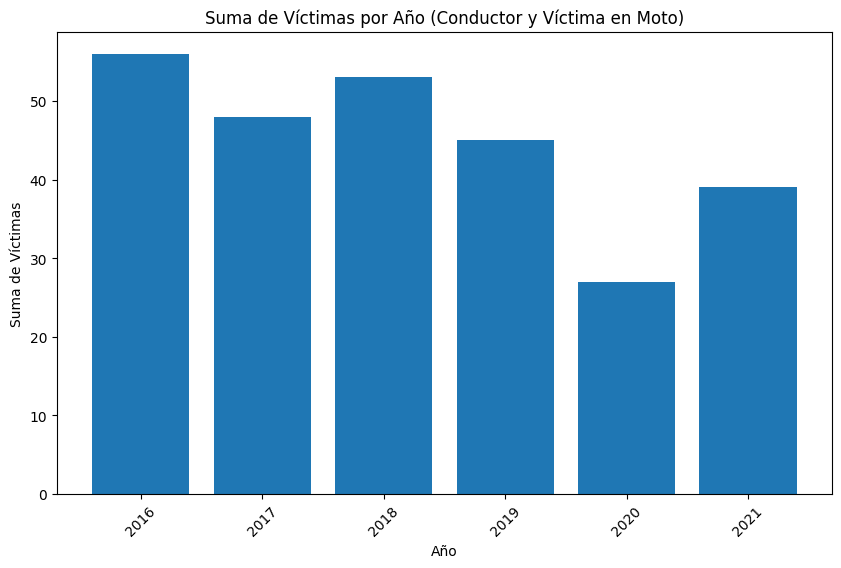

In [10]:
# Se realiza una grafica para observar el logro del segundo KPI

condiciones = (df_merged["ROL"] == "CONDUCTOR") & (df_merged["VICTIMA_y"] == "MOTO")
df_filtrado = df_merged[condiciones]
resumen_anual = df_filtrado.groupby("AAAA_y")["N_VICTIMAS"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(resumen_anual["AAAA_y"], resumen_anual["N_VICTIMAS"])
plt.title("Suma de Víctimas por Año (Conductor y Víctima en Moto)")
plt.xlabel("Año")
plt.ylabel("Suma de Víctimas")
plt.xticks(rotation=45)
plt.show()

In [12]:
resumen_anual = df_filtrado.groupby("AAAA_y")["N_VICTIMAS"].sum().reset_index()
# Se calcula la columna de accidentes mortales de moto.
resumen_anual["AMM"] = ((resumen_anual["N_VICTIMAS"].shift(1) - resumen_anual["N_VICTIMAS"]) / (resumen_anual["N_VICTIMAS"].shift(1)) * 100).fillna(0)
resumen_anual

,AAAA_y,N_VICTIMAS,AMM
0,2016,56,0.000000
1,2017,48,14.285714
2,2018,53,-10.416667
3,2019,45,15.094340
4,2020,27,40.000000
5,2021,39,-44.444444


Se puede observar que los primeros años desde que se tienen mediciones (2016-2019) el valor no ha variado mucho, el porque el no se ve tanta variación en 2019 puede deberse que aunque estaba la pandemia por COVID muchos viajaban en motocicleta como servicios de delivery. Despues el 2020 donde se llevo un confinamiento más estricto se ve una gran disminución de eventos. Lo preocupante de la medición de este KPI es que se puede ver que tiene una tendencia a la alza los últimos años por lo que se deben tomar medidas para empezar a disminuir el numero de estos incidentes.

### Tercer KPI

Nuestro tercer KPI es el siguiente:

Reducir en un 15% la cantidad de homicidios en siniestros viales en la Comuna 1, en CABA, respecto al año anterior.

    Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Se encontro que la población total de la comuna 1 es de 205886 habitantes segun datos oficiales de gobierno encontrados en [Datos Comuna 1](https://www.estadisticaciudad.gob.ar/eyc/?p=1601)

In [4]:
df_3KPI = df[df["COMUNA"]==1]
resumen_año = df_3KPI.groupby(["AAAA"])["N_VICTIMAS"].sum().reset_index()
resumen_año["HSV"] = resumen_año["N_VICTIMAS"]/205886*1000000
resumen_año

,AAAA,N_VICTIMAS,HSV
0,2016,22,106.855250
1,2017,20,97.141136
2,2018,20,97.141136
3,2019,12,58.284682
4,2020,10,48.570568
5,2021,9,43.713511


In [5]:
# Se genera una tabla con el cambio porcentual para contrastar resultados
resumen_año["Cambio_Porcentual"] = resumen_año["HSV"].pct_change() * 100
resumen_año

,AAAA,N_VICTIMAS,HSV,Cambio_Porcentual
0,2016,22,106.855250,NaN
1,2017,20,97.141136,-9.090909
2,2018,20,97.141136,0.000000
3,2019,12,58.284682,-40.000000
4,2020,10,48.570568,-16.666667
5,2021,9,43.713511,-10.000000


Se puede ver claramente que el KPI se cumplio solamente en 2019 y 2020 los años en los que estuvo la pandemia por COVID, siendo el 2019 el año donde se alcanzo una menor cifra de homicidios en siniestros viales. En estos años se llego a un cambio de -40% de la tasa de homicidios en siniestros viales lo cual es muy bueno.

Lo preocupante de este KPI es que nos indica que tiene una tendencia a la alta y en un futuro cercano puede llegar a volver a los números previos a la pandemia.

## Conclusiones 

Se observo que la cantidad de siniestros se mantuvo estable de 2016 a 2018, despues hubo una bajada subita, la cual puede deberse a la pandemia por COVID.

La gran mayoria de las victimas son hombres.

La calle con más siniestros viales es la avenida General Paz, pero esto es debido a que tiene un extension muy amplia ya que atravieza 5 comunas diferentes, la 8, 9, 11, 12 y 13.

LA comuna más letal es la comuna 1 lo cual es extraño ya que esta no es la más grande ni la más poblada.

La gran mayoria de las muertes ocurren en accidentes relacionados con motocicletas, por lo que se puede ver que es el medio de transporte más inseguro.

De estos la mayor cantidad de victimas es a conductores y en menor proporcion a acompañantes, lo que indicaria que la mayoria de conductores viajaba solo.

La gran mayoria de las victimas tienen entre 20 a 39,  por lo que no se descarta que la condución imprudente sea una de las causas más probables de muerte en los siniestros viales.

Se puede ver que la basta mayoria de los siniestros son cuasados por el vehiculos de pasajeros los cuales atropellan a muchos peatones, ademas de que casi todo tipo de vehiculos genera problemas a las motos, incluso objetos fijos.

Se ve que hay una influencia directa en la cantidad de siniestros viales cuando hay cruces y que esta del 75.4 %, lo cual es una cantidad muy alta.

Respecto a los KPIs se cumplen la mitad de las veces por lo que se espera que se tomen acciones para mejorar la seguridad vial.


## Sugerencias para aumentar la seguridad vial

Observando los datos se pueden hacer algunas sugerencias para mejorar la seguridad vial.

Ya que la mayor cantidad de accidentes son sobre motociclistas se plantea colocar limites de velocidad a este tipo de vehiculos, ademas de exigirles el uso de equipo obligatorio.

Se plantea tambien mejorar el moviliario en los cruces ya que la probabilidad de sufrir un siniestro vial es mayor en ellos.

Se plantea tener un mayor cuidado en la comuna 1 ya que es la más peligrosa y no es la que tiene mayor tamaño ni densidad poblacional.